In [25]:
import numpy as np
import matplotlib.pyplot as plt

In [26]:
def initialize_centroids(x,k):
    indices=np.random.choice(len(x), k, replace=False)
    return x[indices]

In [27]:
def assign_to_clusters(x,centroids):
    distances=np.linalg.norm(x[:,np.newaxis] - centroids, axis = 2)
    return np.argmin(distances, axis=1)

In [28]:
def update_centroids(x, labels, k):
    centroids= np.array([x[labels == i].mean(axis=0) for i in range(k)])
    return centroids

In [29]:
def k_means(x, k, max_iters=100):
    centroids=initialize_centroids(x,k)
    # calculate k means
    for _ in range(max_iters):
        labels= assign_to_clusters(x,centroids)
        new_centroids = update_centroids(x, labels, k)
        
        if np.all(centroids == new_centroids):
            break
        centroids= new_centroids
        
    return labels, centroids


In [30]:
np.random.seed(2)

In [31]:
x=np.concatenate([np.random.normal(loc=i, scale=1, size=(50,2)) for i in range(5)])

In [32]:
x

array([[-4.16757847e-01, -5.62668272e-02],
       [-2.13619610e+00,  1.64027081e+00],
       [-1.79343559e+00, -8.41747366e-01],
       [ 5.02881417e-01, -1.24528809e+00],
       [-1.05795222e+00, -9.09007615e-01],
       [ 5.51454045e-01,  2.29220801e+00],
       [ 4.15393930e-02, -1.11792545e+00],
       [ 5.39058321e-01, -5.96159700e-01],
       [-1.91304965e-02,  1.17500122e+00],
       [-7.47870949e-01,  9.02525097e-03],
       [-8.78107893e-01, -1.56434170e-01],
       [ 2.56570452e-01, -9.88779049e-01],
       [-3.38821966e-01, -2.36184031e-01],
       [-6.37655012e-01, -1.18761229e+00],
       [-1.42121723e+00, -1.53495196e-01],
       [-2.69056960e-01,  2.23136679e+00],
       [-2.43476758e+00,  1.12726505e-01],
       [ 3.70444537e-01,  1.35963386e+00],
       [ 5.01857207e-01, -8.44213704e-01],
       [ 9.76147160e-06,  5.42352572e-01],
       [-3.13508197e-01,  7.71011738e-01],
       [-1.86809065e+00,  1.73118467e+00],
       [ 1.46767801e+00, -3.35677339e-01],
       [ 6.

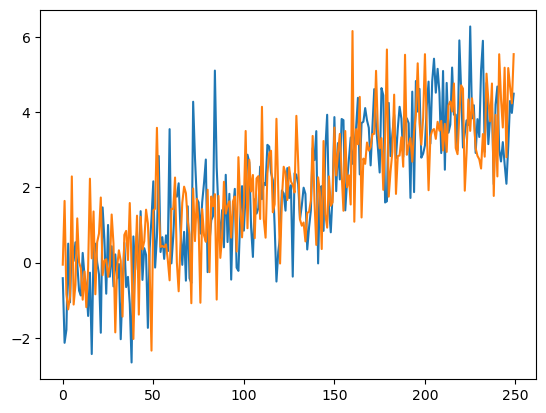

In [33]:
plt.plot(x)

In [34]:
k=5
labels, centroids= k_means(x,k)

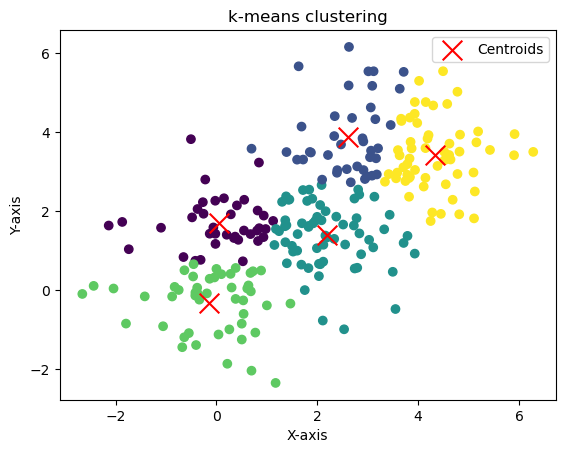

In [35]:
plt.scatter(x[:,0],x[:,1],c=labels, cmap='viridis')
plt.scatter(centroids[:,0],centroids[:,1], marker='x', s=200, c='red', label="Centroids")
plt.title('k-means clustering')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()